In [4]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
import numpy as np

## Step 1: Read and process the data

* These training data are from the same ant dataset we used for support vector machines.
* The response/label/Y variable is species.
* The features are morphological measurements from the ants.

We take the following steps:
1. Read the data using the function read_csv.
2. Extract some labels that we will use later for plotting.
3. Drop columns from the dataframe that we don't want to use for modeling. 

In [5]:
# load ants dataset
dataframe = pd.read_csv('all_measurments2020x09.csv')

# get X and Y 
Y = dataframe['species']
Y2 = dataframe['caste']
combined_label = Y.astype(str) + '_' + Y2.astype(str)
X = dataframe.drop(['species','caste', 'country', 'comment', 'bc_num', 'coll_code'], axis=1)

# standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


## Step 2: Fit the PCA and transform the data.

Now, we are ready to fit the PCA and project our data onto its axes.

Answer the questions about PCA.

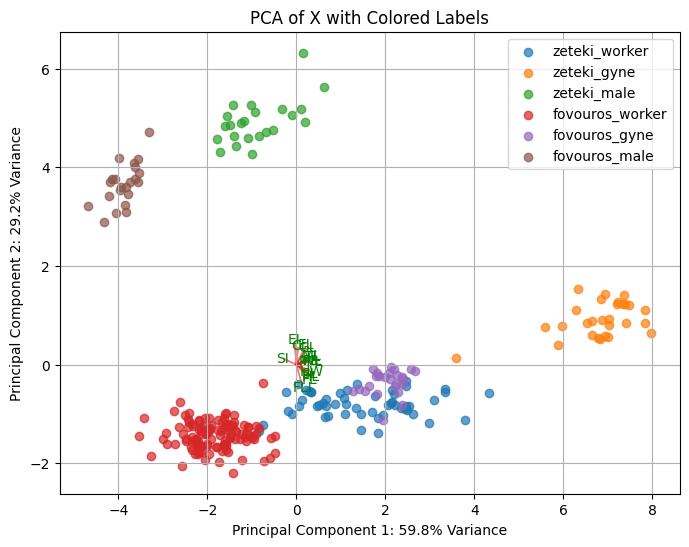

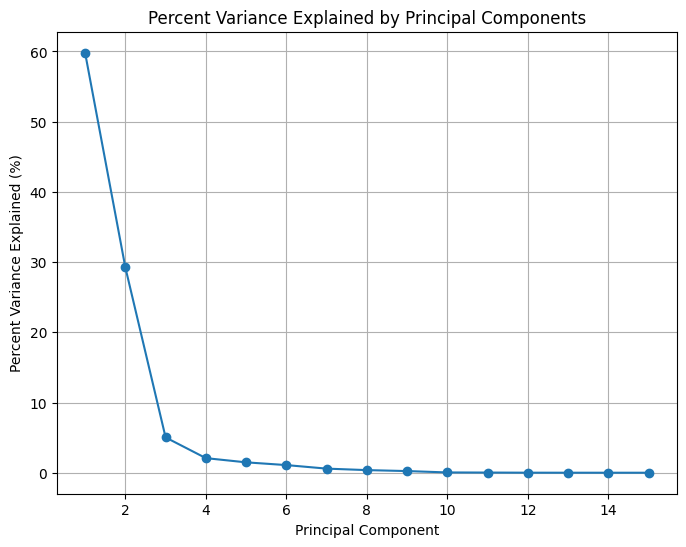

In [6]:
# fit the PCA
pca = PCA()
pca.fit(X_scaled)

# project the data.
X_pca = pca.transform(X_scaled)

# calculate percent variance
explained_variance_pc1 = np.round(pca.explained_variance_ratio_[0] * 100,1)
explained_variance_pc2 = np.round(pca.explained_variance_ratio_[1] * 100,1)


# create a scatter plot colored by combined labels
plt.figure(figsize=(8, 6))
for label in combined_label.unique():
    plt.scatter(X_pca[combined_label == label, 0], X_pca[combined_label == label, 1], label=label, alpha=0.7)

# plot variable loadings as arrows
for i, feature in enumerate(X.columns):
    plt.arrow(0, 0, pca.components_[0, i], pca.components_[1, i], color='r', alpha=0.5)
    plt.text(pca.components_[0, i]*1.1, pca.components_[1, i]*1.1, feature, color='g', ha='center', va='center')

plt.title('PCA of X with Colored Labels')
plt.xlabel(f'Principal Component 1: {explained_variance_pc1}% Variance')
plt.ylabel(f'Principal Component 2: {explained_variance_pc2}% Variance')
plt.legend()
plt.grid(True)
plt.show()

# Get the percent variance explained
percent_variance_explained = pca.explained_variance_ratio_ * 100

# Plot the percent variance explained
plt.figure(figsize=(8, 6))
plt.plot(np.arange(1, len(percent_variance_explained) + 1), percent_variance_explained, 
         marker='o', linestyle='-')
plt.title('Percent Variance Explained by Principal Components')
plt.xlabel('Principal Component')
plt.ylabel('Percent Variance Explained (%)')
plt.grid(True)
plt.show()

# Step 3: TSNE

The code below performs TSNE dimensionality reduction.

Answer the questions about t-SNE

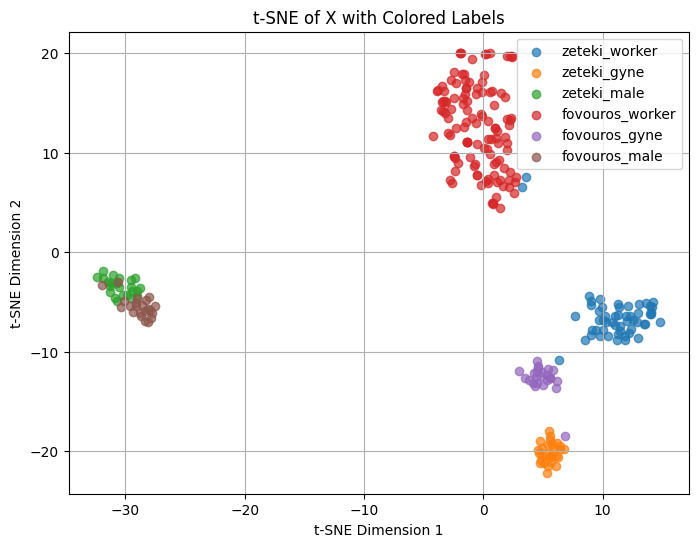

In [7]:

# Perform t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_tsne = tsne.fit_transform(X)

# Plot t-SNE results
plt.figure(figsize=(8, 6))
for label in combined_label.unique():
    plt.scatter(X_tsne[combined_label == label, 0], 
                X_tsne[combined_label == label, 1], 
                label=label, alpha=0.7)

plt.title('t-SNE of X with Colored Labels')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.legend()
plt.grid(True)
plt.show()

## Step 4: Kmeans clustering on the raw data.

Now, we will perform k-means clustering on the raw data.

Then, we plot the inertia (look up what this is: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html).

We can use this to select the appopriate value of k.

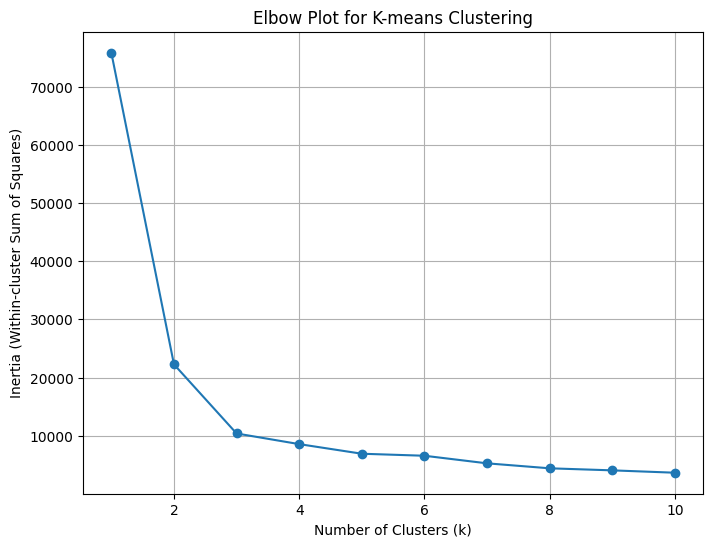

In [8]:
# Define the range of cluster numbers to explore
cluster_range = range(1, 11)  # You can adjust the range as needed

# Initialize a list to store the inertia (within-cluster sum of squares)
inertia_list = []

# Perform K-means clustering for each k in the cluster range
for k in cluster_range:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    inertia_list.append(kmeans.inertia_)

# Plot the elbow plot
plt.figure(figsize=(8, 6))
plt.plot(cluster_range, inertia_list, marker='o')
plt.title('Elbow Plot for K-means Clustering')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Within-cluster Sum of Squares)')
plt.grid(True)
plt.show()

##  Step 5: Select the appropriate K and plot it.

Based on the elbow plot above, choose a value of K and plot it using the below code. We plot agains the Principal Component axes to facilitate visualization.

Answer the questions about k-means.

Text(0, 0.5, 'Principal Component 2')

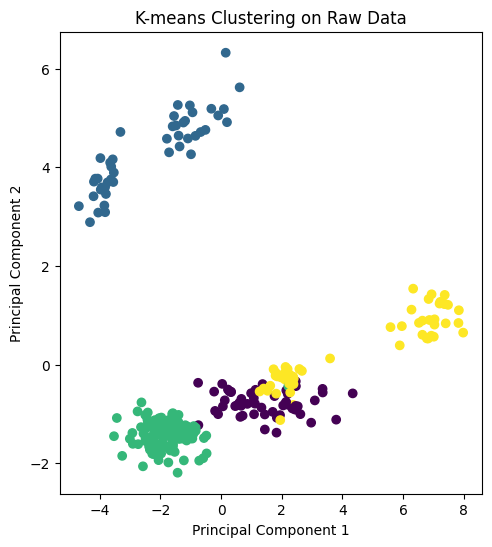

In [9]:
selected_k = 4
kmeans_raw = KMeans(n_clusters=selected_k)
clusters_raw = kmeans_raw.fit_predict(X)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters_raw, cmap='viridis')
plt.title('K-means Clustering on Raw Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

## 6990 Only: Step 6

Perform k-means clustering using some PC axes instead of the raw data. Decide how many PC axes to keep based on the eigenvalues (plotted above.)